In [ ]:
!pip install PyYAML --upgrade
!pip install labelme
!pip install shapely
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     |████████████████████████████████| 636 kB 9.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.5 MB 8.6 MB/s 
     |████████████████████████████████| 7.7 MB 31.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68.3 MB 58 kB/s 
     |████████████████████████████████| 317 kB 64.0 MB/s 
  Created wheel for labelme: filename=labelme-4.5.9-py3-none-any.whl size=1465486 sha256=f552d0fb4739b8cc0677cea8b2daa02b11018e0a492d23b558821b9facc32448
  Stored in directory: /root/.cache/pip/wheels/1a/69/e0/8e8530643e291ff5b3eeb05568d873ad42b08c15166885a288
  Created wheel for imgviz: filename=imgviz-1.2.6-py3-none-any.whl size=7674115 sha256=435adc5a9f75e907f821352d98cee7ed2b75ef7e68e782a9776247334efa9db5
  Stored in directory: /r

In [ ]:
!gdown --id 1_Mm1nQj7SFFSCbsXTcSqJh694-2CRPu9
!unzip train_test.zip

Archive:  train_test.zip
   creating: ShelfImages/
   creating: ShelfImages/test/
  inflating: ShelfImages/test/C4_P07_N3_S3_1.JPG  
  inflating: ShelfImages/test/C1_P02_N2_S3_1.JPG  
  inflating: ShelfImages/test/C2_P02_N1_S4_1.JPG  
  inflating: ShelfImages/test/C4_P08_N1_S3_1.JPG  
  inflating: ShelfImages/test/C4_P04_N4_S2_1.JPG  
  inflating: ShelfImages/test/C1_P04_N3_S3_1.JPG  
  inflating: ShelfImages/test/C3_P04_N1_S5_1.JPG  
  inflating: ShelfImages/test/C4_P05_N2_S2_1.JPG  
  inflating: ShelfImages/test/C4_P01_N2_S2_1.JPG  
  inflating: ShelfImages/test/C1_P11_N2_S3_2.JPG  
  inflating: ShelfImages/test/C1_P06_N1_S4_1.JPG  
  inflating: ShelfImages/test/C1_P04_N1_S4_1.JPG  
  inflating: ShelfImages/test/C1_P11_N1_S3_1.JPG  
  inflating: ShelfImages/test/C4_P08_N3_S3_1.JPG  
  inflating: ShelfImages/test/C2_P01_N1_S4_1.JPG  
  inflating: ShelfImages/test/C1_P03_N1_S3_1.JPG  
  inflating: ShelfImages/test/C1_P11_N2_S4_3.JPG  
  inflating: ShelfImages/test/C3_P02_N1_S2_2.JPG  


In [ ]:
import os
test = os.listdir("/content/ShelfImages/test")
train = os.listdir("/content/ShelfImages/train")

In [ ]:
import pandas as pd
df = pd.read_csv('/content/annotations.csv',names=["filename","xmin","ymin","xmax","ymax","class"]) 

In [ ]:
df['class'] = 1
df['class'].value_counts()

1    13184
Name: class, dtype: int64

In [ ]:
train_anno=df[df['filename'].isin(train)]
test_anno=df[df['filename'].isin(test)]

In [ ]:
"""from PIL import Image                                              
import os, sys                       

path = "/content/ShelfImages/train/"
dirs = os.listdir(path)                                       

def resize():
  global path
  for item in dirs:
    if os.path.isfile(path+item):
      im = Image.open(path+item)
      f, e = os.path.splitext(path+item)
      imResize = im.resize((1920,1080), Image.ANTIALIAS)
      imResize.save(f+'.JPG', 'jpg', quality=80)
resize()"""

'from PIL import Image                                              \nimport os, sys                       \n\npath = "/content/ShelfImages/train/"\ndirs = os.listdir(path)                                       \n\ndef resize():\n  global path\n  for item in dirs:\n    if os.path.isfile(path+item):\n      im = Image.open(path+item)\n      f, e = os.path.splitext(path+item)\n      imResize = im.resize((1920,1080), Image.ANTIALIAS)\n      imResize.save(f+\'.JPG\', \'jpg\', quality=80)\nresize()'

In [ ]:
import numpy as np
import json
import pandas as pd
import cv2

di = {"instances_train.json":train_anno,"instances_test.json":test_anno}

for i in ["instances_train.json","instances_test.json"]:
  save_json_path = i #output path to the json
  data = di[i]
  images = []
  categories = []
  annotations = []

  category = {}
  category["supercategory"] = 'none'
  category["id"] = 0
  category["name"] = 'None'
  categories.append(category)

  data['fileid'] = data['filename'].astype('category').cat.codes
  data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
  data['categoryid'] = data['categoryid']+1
  data['annid'] = data.index

  def image(row):
    image = {}
    im = cv2.imread("ShelfImages/"+i[i.index("_")+1:i.index(".")]+"/"+row.filename)
    image["height"] = im.shape[0]
    image["width"] = im.shape[1]
    image["id"] = row.fileid
    image["file_name"] = row.filename
    return image

  def category(row):
    category = {}
    category["supercategory"] = 'Product'
    print(row)
    category["id"] = row.categoryid
    category["name"] = 'Product'
    return category

  def annotation(row):
    annotation = {}
    area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid
    annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]
    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

  for row in data.itertuples():
    annotations.append(annotation(row))

  imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
  for row in imagedf.itertuples():
    images.append(image(row))

  catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
  for row in catdf.itertuples():
    categories.append(category(row))

  data_coco = {}
  data_coco["images"] = images
  data_coco["categories"] = categories
  data_coco["annotations"] = annotations
  json.dump(data_coco, open(save_json_path, "w"), indent=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Pandas(Index=0, filename='C1_P01_N1_S2_1.JPG', xmin=1008, ymin=1552, xmax=1260, ymax=1928, _6=1, fileid=0, categoryid=1, annid=0)
Pandas(Index=238, filename='C1_P02_N1_S5_1.JPG', xmin=1032, ymin=2080, xmax=1204, ymax=2408, _6=1, fileid=0, categoryid=1, annid=238)


In [ ]:
!git clone https://github.com/aim-uofa/AdelaiDet.git
%cd AdelaiDet
!python setup.py build develop

Cloning into 'AdelaiDet'...
remote: Enumerating objects: 2072, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 2072 (delta 49), reused 87 (delta 43), pack-reused 1958
Receiving objects: 100% (2072/2072), 564.35 KiB | 2.30 MiB/s, done.
Resolving deltas: 100% (1259/1259), done.
/content/AdelaiDet
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/adet
copying adet/__init__.py -> build/lib.linux-x86_64-3.7/adet
creating build/lib.linux-x86_64-3.7/adet/evaluation
copying adet/evaluation/text_eval_script.py -> build/lib.linux-x86_64-3.7/adet/evaluation
copying adet/evaluation/__init__.py -> build/lib.linux-x86_64-3.7/adet/evaluation
copying adet/evaluation/rrc_evaluation_funcs.py -> build/lib.linux-x86_64-3.7/adet/evaluation
copying adet/evaluation/text_evaluation.py -> build/lib.linux-x86_64-3.7/adet/evaluation
creating build/lib.linux-x86_64-3.7/adet/stru

In [ ]:
import random
import cv2
import os 
import numpy as np
import pandas as pd  
import copy
import torch
import base64   
import json
import math
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from google.colab import files

from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_train_loader
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultTrainer
from adet.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode
from detectron2.engine.defaults import DefaultPredictor
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from fvcore.transforms.transform import TransformList, Transform, NoOpTransform

In [ ]:
## Registering data in COCO format
for d in ["train","test"]:
    register_coco_instances(f"grocery_{d}", {}, f"/content/instances_{d}.json", f"/content/ShelfImages/{d}/")

In [ ]:
## Loading the data

dataset_dicts = DatasetCatalog.get("grocery_train")
grocery_metadata = MetadataCatalog.get("grocery_train")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [ ]:
class CutMix(Transform):
    
    def __init__(self, box_size=100, prob_cutmix=0.5):
        super().__init__()
        
        self.box_size = box_size
        self.prob_cutmix = prob_cutmix
        
    def apply_image(self, img):
        
        if random.random() > self.prob_cutmix:
            
            h, w = img.shape[:2]
            num_rand = np.random.randint(10, 20)
            for num_cut in range(num_rand):
                x_rand, y_rand = random.randint(0, w-self.box_size), random.randint(0, h-self.box_size)
                img[x_rand:x_rand+self.box_size, y_rand:y_rand+self.box_size, :] = 0
        
        return np.asarray(img)
    
    def apply_coords(self, coords):
        return coords.astype(np.float32)

In [ ]:
## Making a Cutsom Mapper to perform augmentations

def custom_mapper(dataset_dict):
    dataset_dict = copy.deepcopy(dataset_dict)  
    image = utils.read_image(dataset_dict["file_name"], format="BGR")
    transform_list = [T.Resize((900,900)),
                      T.RandomFlip(prob=0.5, horizontal=False, vertical=True),
                      T.RandomFlip(prob=0.5, horizontal=True, vertical=False),
                      T.RandomApply(T.RandomRotation(angle=[-90,90], expand=True, center=None, sample_style="range", interp=None), prob=0.25),
                      T.RandomApply(T.RandomCrop(crop_type="relative_range", crop_size=(0.4, 0.6)), 
                      prob=0.20)
                      ]
   
    image, transforms = T.apply_transform_gens(transform_list, image)
    dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

    annos = [
        utils.transform_instance_annotations(obj, transforms, image.shape[:2])
        for obj in dataset_dict.pop("annotations")
        if obj.get("iscrowd", 0) == 0
    ]
    instances = utils.annotations_to_instances(annos, image.shape[:2])
    dataset_dict["instances"] = utils.filter_empty_instances(instances)
    return dataset_dict

## Class which can call the custom mapper we made

class GroceryTrainer(DefaultTrainer):
    
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(cfg, mapper=custom_mapper)

{'file_name': '/content/ShelfImages/train/C1_P09_N1_S5_2.JPG', 'height': 2334, 'width': 3264, 'image_id': 61, 'annotations': [{'iscrowd': 0, 'bbox': [1052, 1680, 176, 248], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1052, 676, 164, 264], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1068, 1384, 164, 228], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1212, 680, 164, 264], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1220, 1676, 156, 272], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1224, 1040, 164, 232], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1224, 1352, 164, 260], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1232, 2044, 132, 232], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1360, 2032, 156, 220], 'category_id'

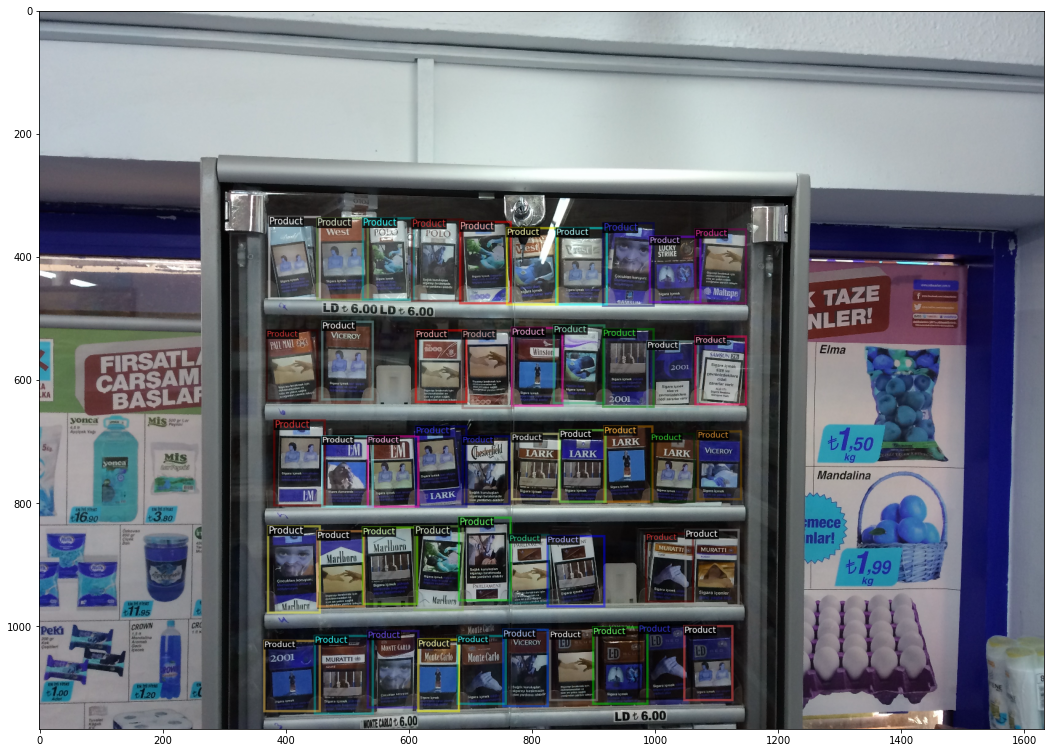

{'file_name': '/content/ShelfImages/train/C3_P02_N2_S4_1.JPG', 'height': 2432, 'width': 2931, 'image_id': 184, 'annotations': [{'iscrowd': 0, 'bbox': [1096, 216, 212, 316], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1128, 2056, 204, 296], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1144, 1440, 188, 340], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1312, 2056, 204, 304], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1332, 1504, 204, 292], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1520, 2084, 188, 272], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1532, 1496, 204, 292], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1628, 820, 212, 364], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1708, 2088, 188, 272], 'category_id

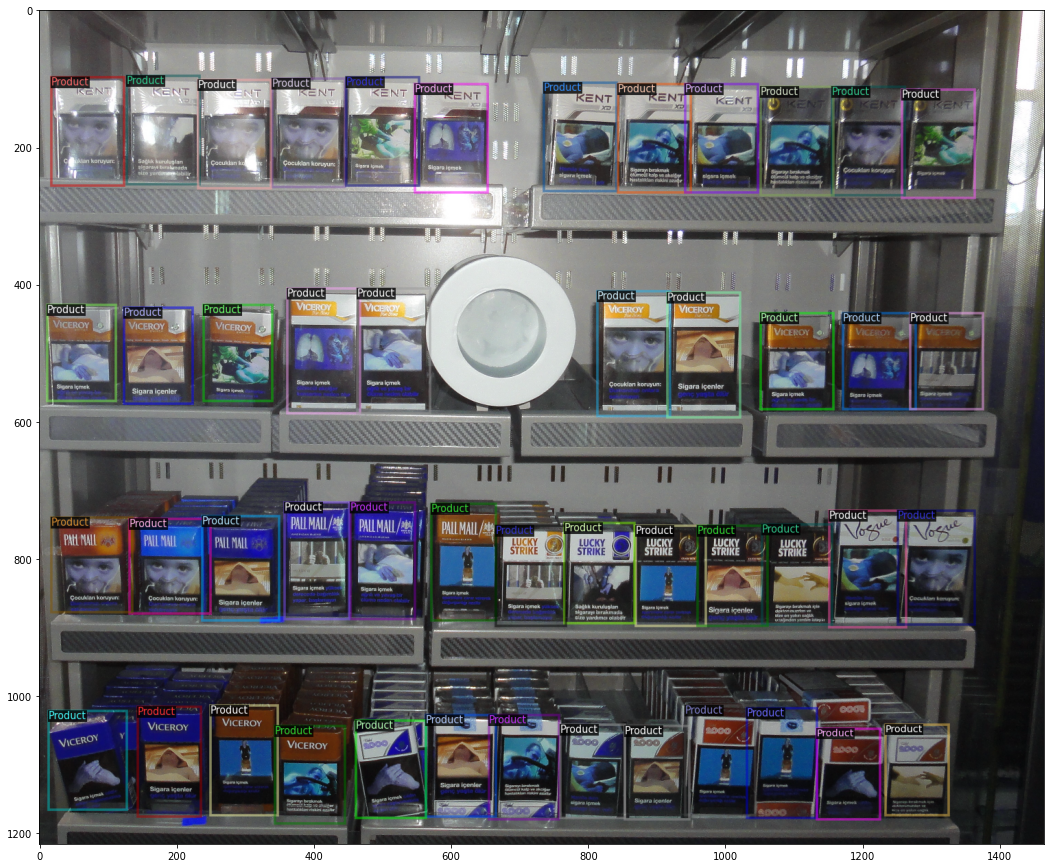

{'file_name': '/content/ShelfImages/train/C1_P07_N1_S3_2.JPG', 'height': 2448, 'width': 3264, 'image_id': 46, 'annotations': [{'iscrowd': 0, 'bbox': [144, 2008, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1796, 2012, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1808, 1384, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1992, 1384, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [2008, 2016, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [2212, 1392, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [2236, 2028, 204, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [224, 744, 200, 280], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [2252, 748, 204, 280], 'category_id': 

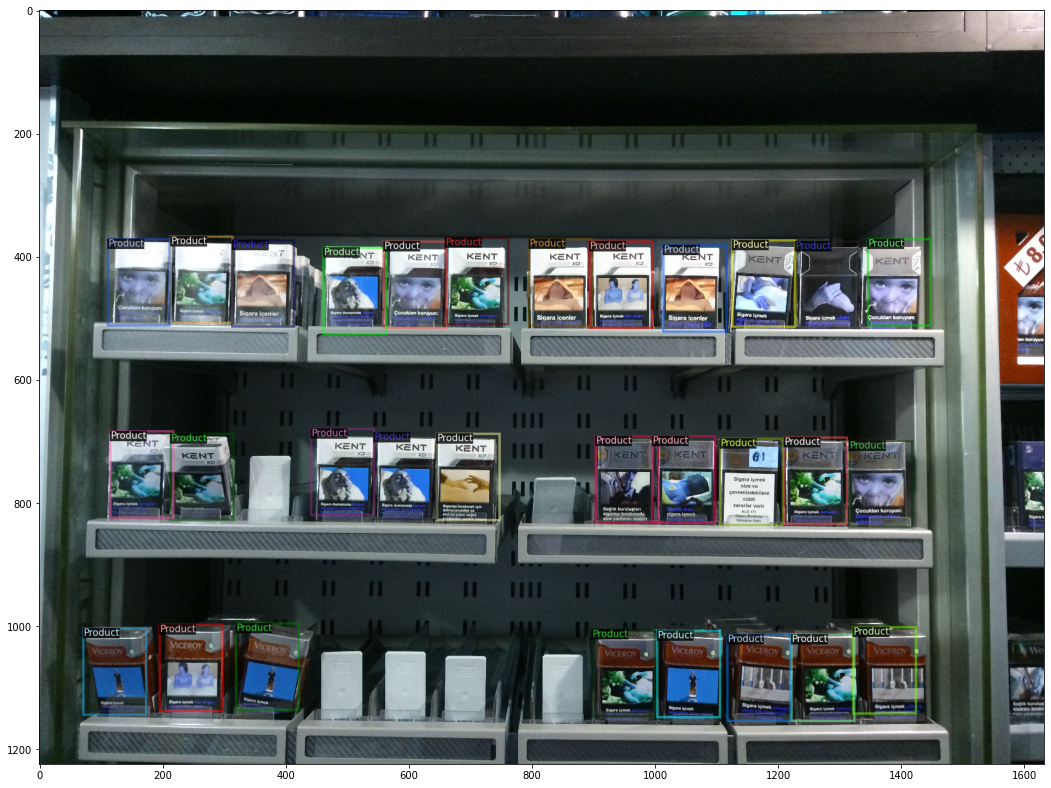

In [ ]:
#Display random 3 images:
for d in random.sample(dataset_dicts, 3):
    print(d)
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=grocery_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (18, 18))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()

In [ ]:
#Training
cfg = get_cfg()
cfg.merge_from_file("configs/FCOS-Detection/MS_R_50_2x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

WARNING [08/16 07:09:20 d2.config.compat]: Config 'configs/FCOS-Detection/MS_R_50_2x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [ ]:
cfg.DATASETS.TRAIN = ("grocery_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/MSRA/R-50.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 20000

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = GroceryTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[08/16 08:07:32 d2.engine.defaults]: Model:
OneStageDetector(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      

/usr/local/lib/python3.7/dist-packages/fvcore/transforms/transform.py:434: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  tensor = torch.from_numpy(np.ascontiguousarray(img))
/usr/local/lib/python3.7/dist-packages/fvcore/transforms/transform.py:434: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be

[08/16 08:07:46 d2.utils.events]:  eta: 1:41:37  iter: 10019  total_loss: 0.8475  loss_fcos_cls: 0.09316  loss_fcos_loc: 0.1375  loss_fcos_ctr: 0.6088  time: 0.6631  data_time: 0.1308  lr: 0.00025  max_mem: 4444M
[08/16 08:07:59 d2.utils.events]:  eta: 1:35:21  iter: 10039  total_loss: 0.8481  loss_fcos_cls: 0.104  loss_fcos_loc: 0.1386  loss_fcos_ctr: 0.6065  time: 0.6469  data_time: 0.0675  lr: 0.00025  max_mem: 4444M
[08/16 08:08:13 d2.utils.events]:  eta: 1:44:19  iter: 10059  total_loss: 0.8429  loss_fcos_cls: 0.1052  loss_fcos_loc: 0.1474  loss_fcos_ctr: 0.6003  time: 0.6728  data_time: 0.0552  lr: 0.00025  max_mem: 4444M
[08/16 08:08:27 d2.utils.events]:  eta: 1:45:25  iter: 10079  total_loss: 0.8372  loss_fcos_cls: 0.09609  loss_fcos_loc: 0.137  loss_fcos_ctr: 0.6095  time: 0.6739  data_time: 0.1180  lr: 0.00025  max_mem: 4444M
[08/16 08:08:41 d2.utils.events]:  eta: 1:45:12  iter: 10099  total_loss: 0.8557  loss_fcos_cls: 0.08905  loss_fcos_loc: 0.1433  loss_fcos_ctr: 0.6158  

In [ ]:
#Testing
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we trained
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.3
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3
cfg.MODEL.FCOS.INFERENCE_TH_TEST = 0.3
cfg.MODEL.MEInst.INFERENCE_TH_TEST = 0.3
cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = 0.3
predictor = DefaultPredictor(cfg)

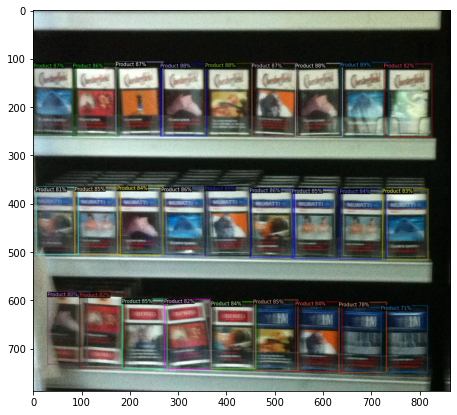

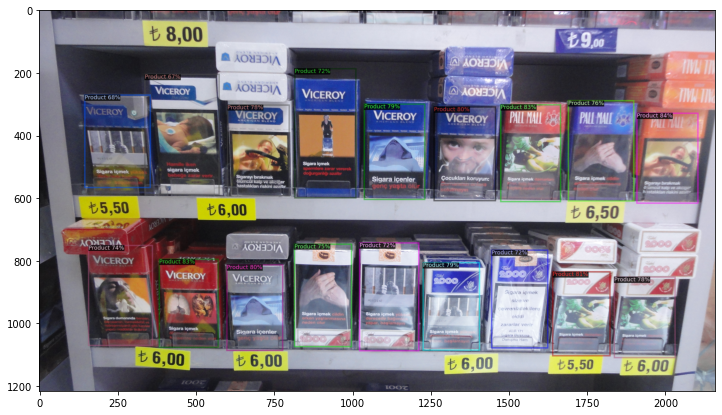

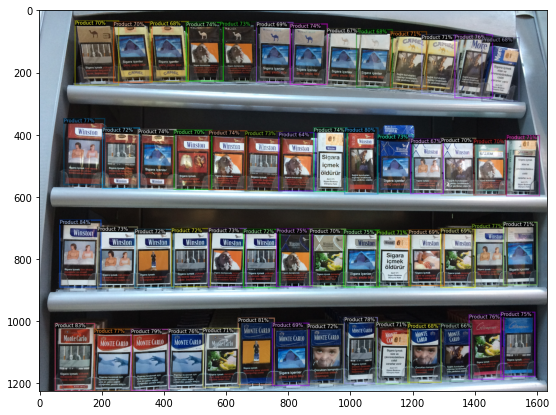

In [ ]:
from detectron2.utils.visualizer import ColorMode
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im) 
    v = Visualizer(im[:, :, ::-1],
                   metadata=grocery_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. Only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize=(15,7))
    plt.imshow(out.get_image()[:, :, ::-1][..., ::-1])

In [ ]:
# Evaluation
!mkdir output/inference

mkdir: cannot create directory ‘output/inference’: File exists


In [ ]:
from detectron2.evaluation import (
    COCOEvaluator,
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    verify_results,
)
from detectron2.evaluation import inference_on_dataset

In [ ]:
output_folder="output/"        
output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
evaluator_list = []
evaluator_type = MetadataCatalog.get("grocery_test").evaluator_type
evaluator_list.append(COCOEvaluator("grocery_test", cfg, True, output_folder))

WARNING [08/16 09:59:01 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.


In [ ]:
eval = DatasetEvaluators(evaluator_list)

In [ ]:
from detectron2.data import build_detection_test_loader
val_loader = build_detection_test_loader(cfg, "grocery_test")
print(inference_on_dataset(trainer.model, val_loader, eval))

WARNING [08/16 09:59:01 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/16 09:59:01 d2.data.datasets.coco]: Loaded 71 images in COCO format from /content/instances_test.json
[08/16 09:59:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/16 09:59:01 d2.data.common]: Serializing 71 elements to byte tensors and concatenating them all ...
[08/16 09:59:01 d2.data.common]: Serialized dataset takes 0.10 MiB
[08/16 09:59:01 d2.evaluation.evaluator]: Start inference on 71 batches
[08/16 09:59:05 d2.evaluation.evaluator]: Inference done 11/71. Dataloading: 0.1640 s/iter. Inference: 0.1102 s/iter. Eval: 0.0004 s/iter. Total: 0.2747 s/iter. ETA=0:00:16
[08/16 09:59:10 d2.evaluation.evaluator]: Inference done 29/71. Dataloading: 0.1815 s/iter. Inference: 0.1054 s/iter. Eval: 0.0009 s/iter. Total: 0.2880 s/iter. 

In [99]:
!mkdir outputs
dicts = {}
for i in os.listdir("ShelfImages/test"):
    im = cv2.imread("ShelfImages/test/"+i)
    outputs = predictor(im) 
    v = Visualizer(im[:, :, ::-1],
                   metadata=grocery_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW)  # remove the colors of unsegmented pixels. Only available for segmentation models
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    dicts[i] = len(outputs["instances"])
    x = cv2.cvtColor(out.get_image()[:, :, ::-1][..., ::-1],cv2.COLOR_BGR2RGB)
    cv2.imwrite("outputs/"+i,x)
    print("Wrote:outputs/"+i)

mkdir: cannot create directory ‘outputs’: File exists
Wrote:outputs/C1_P10_N1_S3_1.JPG
Wrote:outputs/C4_P03_N1_S4_1.JPG
Wrote:outputs/C1_P08_N2_S4_1.JPG
Wrote:outputs/C1_P11_N2_S4_3.JPG
Wrote:outputs/C1_P03_N1_S2_1.JPG
Wrote:outputs/C2_P03_N2_S3_1.JPG
Wrote:outputs/C4_P07_N1_S3_1.JPG
Wrote:outputs/C2_P07_N1_S6_1.JPG
Wrote:outputs/C4_P08_N1_S4_1.JPG
Wrote:outputs/C2_P05_N3_S3_1.JPG
Wrote:outputs/C1_P10_N1_S5_1.JPG
Wrote:outputs/C4_P05_N2_S2_1.JPG
Wrote:outputs/C1_P11_N1_S3_1.JPG
Wrote:outputs/C3_P03_N3_S3_1.JPG
Wrote:outputs/C1_P06_N1_S5_1.JPG
Wrote:outputs/C4_P07_N1_S3_2.JPG
Wrote:outputs/C1_P06_N1_S4_1.JPG
Wrote:outputs/C1_P03_N2_S3_1.JPG
Wrote:outputs/C3_P02_N1_S2_2.JPG
Wrote:outputs/C1_P12_N2_S3_1.JPG
Wrote:outputs/C1_P12_N1_S5_1.JPG
Wrote:outputs/C1_P03_N3_S2_1.JPG
Wrote:outputs/C3_P01_N1_S5_1.JPG
Wrote:outputs/C2_P01_N1_S4_1.JPG
Wrote:outputs/C3_P03_N1_S3_1.JPG
Wrote:outputs/C3_P06_N4_S3_1.JPG
Wrote:outputs/C1_P03_N1_S3_1.JPG
Wrote:outputs/C1_P11_N2_S4_2.JPG
Wrote:outputs/C1_P04_N

In [103]:
with open('image2products.json', 'a') as outfile:
    json.dump(dicts, outfile, indent=2)

In [100]:
!zip -r outputs.zip outputs

  adding: outputs/ (stored 0%)
  adding: outputs/C1_P10_N1_S3_1.JPG (deflated 0%)
  adding: outputs/C4_P03_N1_S4_1.JPG (deflated 0%)
  adding: outputs/C1_P08_N2_S4_1.JPG (deflated 0%)
  adding: outputs/C1_P11_N2_S4_3.JPG (deflated 0%)
  adding: outputs/C1_P03_N1_S2_1.JPG (deflated 0%)
  adding: outputs/C2_P03_N2_S3_1.JPG (deflated 0%)
  adding: outputs/C4_P07_N1_S3_1.JPG (deflated 0%)
  adding: outputs/C2_P07_N1_S6_1.JPG (deflated 0%)
  adding: outputs/C4_P08_N1_S4_1.JPG (deflated 0%)
  adding: outputs/C2_P05_N3_S3_1.JPG (deflated 0%)
  adding: outputs/C1_P10_N1_S5_1.JPG (deflated 0%)
  adding: outputs/C4_P05_N2_S2_1.JPG (deflated 0%)
  adding: outputs/C1_P11_N1_S3_1.JPG (deflated 0%)
  adding: outputs/C3_P03_N3_S3_1.JPG (deflated 0%)
  adding: outputs/C1_P06_N1_S5_1.JPG (deflated 0%)
  adding: outputs/C4_P07_N1_S3_2.JPG (deflated 0%)
  adding: outputs/C1_P06_N1_S4_1.JPG (deflated 0%)
  adding: outputs/C1_P03_N2_S3_1.JPG (deflated 0%)
  adding: outputs/C3_P02_N1_S2_2.JPG (deflated 0%)
